# Testing LOSD
### Bodennutzung und Grundeigentum in der Stadt Zürich

Der Datensatz enthält Angaben zu Bodennutzung und Grundeigentum für das Gebiet der Stadt Zürich nach Stadtquartier

https://data.integ.stadt-zuerich.ch/dataset/bau612od6120

Datum: 28.05.2024

### Colab
Mit Colab kann das Jupyter-Notebook interaktiv im Browser gestartet werden. 

Klicke auf den Button:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/DonGoginho/colab/blob/main/losd/xyz.ipynb)


### Importiere die notwendigen Packages

In [1]:
#%pip install altair datetime folium geopandas io requests matplotlib numpy pandas seaborn plotly
!pip install altair==5.0.1 vl-convert-python

In [2]:
import altair as alt
import datetime
import folium 
import geopandas as gpd
import io
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pivottablejs
#from pivottablejs import pivot_ui
import plotly.express as px
import requests
import seaborn as sns

Importiere die eigenen Funktionen, die unter ../0_scripts abegelegt sind:

1) Klone das Github-Repo auf Colab. Sonst werden die Skripts nicht gelesen...

In [ ]:
!git clone https://github.com/DonGoginho/colab.git


fatal: destination path 'colab' already exists and is not an empty directory.


2) Checke die Schreibrechte in den geklonten Verzeichnissen

In [ ]:
!ls -l /content/colab
!ls -l /content/colab/losd


total 20
drwxr-xr-x 4 root root 4096 Jul  3 12:58 0_scripts
drwxr-xr-x 2 root root 4096 Jul  3 12:58 archiv
-rw-r--r-- 1 root root 1211 Jul  3 12:58 LICENSE
drwxr-xr-x 5 root root 4096 Jul  3 12:58 losd
-rw-r--r-- 1 root root 1755 Jul  3 12:58 README.md
total 4484
-rw-r--r-- 1 root root  216728 Jul  3 12:58 bev3160_losd_bev_bestand_jahr_konfession_od3160.ipynb
-rw-r--r-- 1 root root 1755589 Jul  3 12:58 bev3240_losd_bev_bestand_jahr_quartier_od3240.ipynb
-rw-r--r-- 1 root root  696643 Jul  3 12:58 bev3241_losd_bev_bestand_jahr_statzonen_od3241.ipynb
-rw-r--r-- 1 root root 1152082 Jul  3 12:58 bev3242_losd_bev_bestand_jahr_kreis_od3242.ipynb
-rw-r--r-- 1 root root  285094 Jul  3 12:58 bev3243_losd_bev_bestand_jahr_od3243.ipynb
-rw-r--r-- 1 root root  461744 Jul  3 12:58 colab_bev3243_losd_bev_bestand_jahr_od3243.ipynb
drwxr-xr-x 2 root root    4096 Jul  3 12:59 grafiken_testing
drwxr-xr-x 2 root root    4096 Jul  3 12:58 org_ipynb
drwxr-xr-x 2 root root    4096 Jul  3 12:58 saved_data


3) Importiere die Skripts

In [ ]:
import sys
sys.path.append('/content/colab/0_scripts')

import my_py_dataviz_functions as mypy_dv
import my_py_dataloading_functions as mypy_dl

In [4]:
SSL_VERIFY = False
# evtl. SSL_VERIFY auf False setzen wenn die Verbindung zu https://www.gemeinderat-zuerich.ch nicht klappt (z.B. wegen Proxy)
# Um die SSL Verifikation auszustellen, bitte die nächste Zeile einkommentieren ("#" entfernen)
# SSL_VERIFY = False

In [5]:
if not SSL_VERIFY:
    import urllib3
    urllib3.disable_warnings()

### Settings
Definiere Settings. 
Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen)

In [6]:
#pd.options.display.float_format = lambda x : '{:,.1f}'.format(x) if (np.isnan(x) | np.isinf(x)) else '{:,.0f}'.format(x) if int(x) == x else '{:,.1f}'.format(x)
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

#### Zeitvariabeln

In [7]:
#Zeitvariabeln als Strings:
now = datetime.date.today()
year_today = now.strftime("%Y")
date_today = "_"+now.strftime("%Y-%m-%d")

#Zeitvariabeln als Integers:
int_times = now.timetuple()
aktuellesJahr = int_times[0]
aktuellerMonat = int_times[1]
selectedMonat = int_times[1]-2
#print(aktuellesJahr, aktuellerMonat,'datenstand: ', selectedMonat, int_times)

### Daten importieren und Metadaten checken

- status: int / prod
- data_source: web / ld / dropzone
- datums_attr: beschreibt das oder die Datumsfelder, die als Datum geparsed werden sollen. Falls es keines gibt: None

In [8]:
#speichere die variable global, damit ich sie später verwenden kann, wenn ich grafiken mit diesem namen speichere.
package_name = "bau612od6120"

In [9]:
data2betested = mypy_dl.load_data(
    status = 'int'
    , data_source = 'ld'
    , package_name = package_name
    , dataset_name = "bau612od6120.csv"    
    , datums_attr = ['ZEIT_LANG']
    )

fp lautet:https://ld.integ.stadt-zuerich.ch/statistics/view/BAU612OD6120/observation?format=csv


 **Überprüfe die Metadaten:**

 **Dataset auf INTEG-Datakatalog:** Link https://data.integ.stadt-zuerich.ch/dataset/bau612od6120 

 **View auf INTEG-LD:** Link https://ld.integ.stadt-zuerich.ch/statistics/view/BAU612OD6120 

data_source: web


In [10]:
data2betested.head(2).T

0                    1
ZEIT_LANG      2018-12-31 00:00:00  2016-12-31 00:00:00
ZEIT_CODE                Z31122018            Z31122016
RAUM_LANG             Alt-Wiedikon          Albisrieden
RAUM_CODE                   R00031               R00091
EIG_LANG              Einzelperson  Städtische Stiftung
EIG_CODE                   EIG1101              EIG2102
BBA_LANG                  Trottoir    Gebäude Industrie
BBA_CODE                   BBA1315              BBA1108
GSF                            118                  679
KREISEZH_LANG    Kreis 3 (ab 1915)    Kreis 9 (ab 1934)
KREISEZH_CODE               R00600               R01400

Berechne weitere Attribute falls notwendig

In [11]:
data2betested = (
    data2betested
    .copy()
    .assign(
        #Aktualisierungs_Datum_str= lambda x: x.Aktualisierungs_Datum.astype(str),
        StichtagDatJahr = lambda x: x.ZEIT_LANG,
        StichtagDatJahr_str = lambda x: x.ZEIT_LANG.astype(str),
        Jahr = lambda x: x.ZEIT_LANG.dt.year,
        #Jahr_nbr = lambda x: x.ZEIT_CODE.str[-4:].astype(int),    
        RAUM_my_sort = lambda x: x.RAUM_CODE.str[-3:].astype(int),

    )
    .sort_values('ZEIT_LANG', ascending=False)
    )
data2betested.head(2).T

79070                 98947
ZEIT_LANG                                          2023-12-31 00:00:00   2023-12-31 00:00:00
ZEIT_CODE                                                    Z31122023             Z31122023
RAUM_LANG                                                      Saatlen            Hirslanden
RAUM_CODE                                                       R00121                R00073
EIG_LANG                                                          Bund          Stadt Zürich
EIG_CODE                                                       EIG2202               EIG2101
BBA_LANG                                                 Hausumschwung  Verkehrsteilerfläche
BBA_CODE                                                       BBA1111               BBA1323
GSF                                                               3533                  1608
KREISEZH_LANG        altes Quartier Schwamendingen (1934-1969); Kre...     Kreis 7 (ab 1934)
KREISEZH_CODE                                                   R01700                R01300
StichtagDatJahr                                    2023-12-31 00:00:00   2023-12-31 00:00:00
StichtagDatJahr_str                                         2023-12-31            2023-12-31
Jahr                                                              2023                  2023
RAUM_my_sort                                                       121                    73

Zeitbereich aus den Daten:

In [12]:
data_max_date = str(max(data2betested.ZEIT_LANG).year)
data_min_date = str(min(data2betested.ZEIT_LANG).year)

print(f"Die Daten haben ein Minimumjahr von {data_min_date} und ein Maximumjahr von {data_max_date}")


Die Daten haben ein Minimumjahr von 2009 und ein Maximumjahr von 2023


Temp speichere die csv-Datei, da es immer wieder zu Ausfällen kommt. So kann ich mal den Report fertig bauen.

In [13]:
docname = package_name +date_today+".csv"
print(docname)


bau612od6120_2024-07-04.csv


In [14]:
data2betested.to_csv('/content/colab/losd/saved_data/'+docname, index=False)

### Einfache Datentests

In [15]:
data2betested.head(2).T

79070                 98947
ZEIT_LANG                                          2023-12-31 00:00:00   2023-12-31 00:00:00
ZEIT_CODE                                                    Z31122023             Z31122023
RAUM_LANG                                                      Saatlen            Hirslanden
RAUM_CODE                                                       R00121                R00073
EIG_LANG                                                          Bund          Stadt Zürich
EIG_CODE                                                       EIG2202               EIG2101
BBA_LANG                                                 Hausumschwung  Verkehrsteilerfläche
BBA_CODE                                                       BBA1111               BBA1323
GSF                                                               3533                  1608
KREISEZH_LANG        altes Quartier Schwamendingen (1934-1969); Kre...     Kreis 7 (ab 1934)
KREISEZH_CODE                                                   R01700                R01300
StichtagDatJahr                                    2023-12-31 00:00:00   2023-12-31 00:00:00
StichtagDatJahr_str                                         2023-12-31            2023-12-31
Jahr                                                              2023                  2023
RAUM_my_sort                                                       121                    73

In [16]:
data2betested.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 158140 entries, 79070 to 96723
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ZEIT_LANG            158140 non-null  datetime64[ns]
 1   ZEIT_CODE            158140 non-null  object        
 2   RAUM_LANG            158140 non-null  object        
 3   RAUM_CODE            158140 non-null  object        
 4   EIG_LANG             158140 non-null  object        
 5   EIG_CODE             158140 non-null  object        
 6   BBA_LANG             158140 non-null  object        
 7   BBA_CODE             158140 non-null  object        
 8   GSF                  158140 non-null  float64       
 9   KREISEZH_LANG        158140 non-null  object        
 10  KREISEZH_CODE        158140 non-null  object        
 11  StichtagDatJahr      158140 non-null  datetime64[ns]
 12  StichtagDatJahr_str  158140 non-null  object        
 13  Jahr            

In [17]:
print(f'The dataset has {data2betested.shape[0]:,.0f} rows (observations) and {data2betested.shape[1]:,.0f} columns (variables).')
print(f'There seem to be {data2betested.duplicated().sum()} exact duplicates in the data.')

The dataset has 158,140 rows (observations) and 15 columns (variables).
There seem to be 0 exact duplicates in the data.


Welches sind die Quartiere ohne Werte bei BEW?

In [18]:
data2betested[np.isnan(data2betested.GSF)]

Empty DataFrame
Columns: [ZEIT_LANG, ZEIT_CODE, RAUM_LANG, RAUM_CODE, EIG_LANG, EIG_CODE, BBA_LANG, BBA_CODE, GSF, KREISEZH_LANG, KREISEZH_CODE, StichtagDatJahr, StichtagDatJahr_str, Jahr, RAUM_my_sort]
Index: []

### Verwende das Datum als Index

While we did already parse the `datetime` column into the respective datetime type, it currently is just a regular column. 
**To enable quick and convenient queries and aggregations, we need to turn it into the index of the DataFrame**

In [19]:
data2betested = data2betested.set_index("StichtagDatJahr") 
data2betested = data2betested.sort_index()

In [20]:
data2betested.index.year.unique()

Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int32', name='StichtagDatJahr')

### Beschreibe einzelne Attribute

Beschreibe nicht numerische Attribute

In [21]:
# describe non-numerical features
try:
    with pd.option_context('display.float_format', '{:,.2f}'.format):
        display(data2betested.describe(exclude='number',datetime_is_numeric=True))
except:
    print("No categorical data in dataset.")

No categorical data in dataset.


Beschreibe numerische Attribute

In [22]:
# describe numerical features
try:
    with pd.option_context('display.float_format', '{:,.0f}'.format):
        display(data2betested.describe(include='number'))
except:
    print("No numercial data in dataset.")

GSF    Jahr  RAUM_my_sort
count   158,140 158,140       158,140
mean     31,051   2,016            68
std     149,273       4            36
min           1   2,009            11
25%         258   2,012            33
50%       1,481   2,016            72
75%       9,808   2,020           101
max   3,121,553   2,023           123

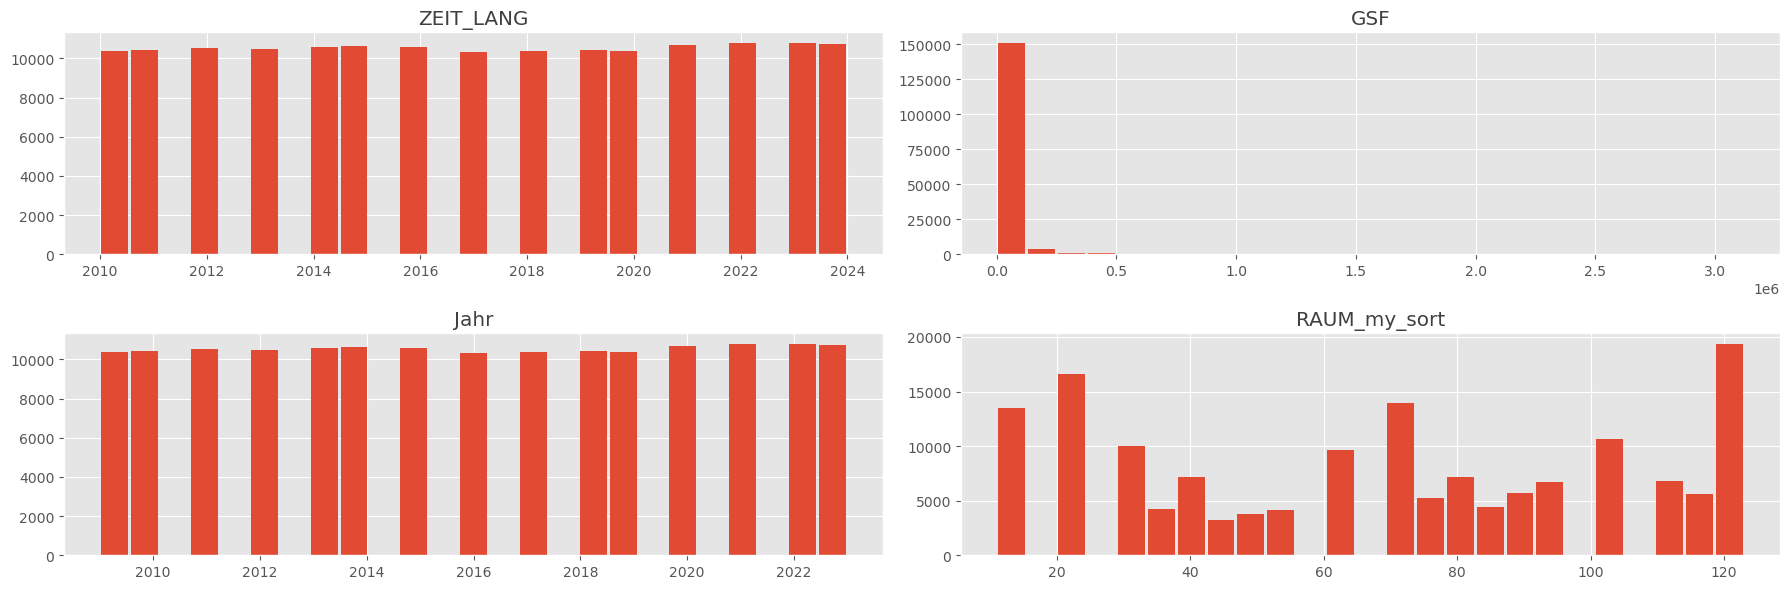

In [23]:
plt.style.use('ggplot')
params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }
plt.rcParams.update(params)

try:
    data2betested.hist(bins=25, rwidth=0.9)
    plt.tight_layout()
    plt.show()
except:
    print("No numercial data to plot.") 

### Gibt es Duplikate?

In [24]:
# find duplicate rows
duplicate_rows = data2betested[data2betested.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [ZEIT_LANG, ZEIT_CODE, RAUM_LANG, RAUM_CODE, EIG_LANG, EIG_CODE, BBA_LANG, BBA_CODE, GSF, KREISEZH_LANG, KREISEZH_CODE, StichtagDatJahr_str, Jahr, RAUM_my_sort]
Index: []

### Nullwerte und Missings?

In [25]:
data2betested.isnull().sum()

ZEIT_LANG              0
ZEIT_CODE              0
RAUM_LANG              0
RAUM_CODE              0
EIG_LANG               0
EIG_CODE               0
BBA_LANG               0
BBA_CODE               0
GSF                    0
KREISEZH_LANG          0
KREISEZH_CODE          0
StichtagDatJahr_str    0
Jahr                   0
RAUM_my_sort           0
dtype: int64

In [26]:
# check missing values with missingno
# https://github.com/ResidentMario/missingno
#import missingno as msno
#msno.matrix(data2betested, labels=True, sort='descending');
#msno.heatmap(data2betested)

### Gruppierungen

In [27]:
agg_jahr = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['Jahr']) \
    .agg(sum_GSF=('GSF', 'sum')) \
    .sort_values('Jahr', ascending=False) 
agg_jahr.reset_index().head(3)

Jahr   sum_GSF
0  2023 306143251
1  2022 327992654
2  2021 327986901

In [28]:
agg_Quarts = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['RAUM_my_sort', 'RAUM_LANG', 'RAUM_CODE']) \
    .agg(sum_GSF=('GSF', 'sum')) \
    .sort_values('RAUM_CODE', ascending=False) 
agg_Quarts.reset_index().head(50)

RAUM_my_sort             RAUM_LANG RAUM_CODE   sum_GSF
0            123            Hirzenbach    R00123 128059485
1            122  Schwamendingen-Mitte    R00122 157707756
2            121               Saatlen    R00121  64803434
3            119               Seebach    R00119 261740983
4            115              Oerlikon    R00115 156671658
5            111             Affoltern    R00111 318869412
6            102             Wipkingen    R00102 115184332
7            101                 Höngg    R00101 365183529
8             92            Altstetten    R00092 429184041
9             91           Albisrieden    R00091 240130279
10            83               Weinegg    R00083  97480430
11            82             Mühlebach    R00082  37180763
12            81               Seefeld    R00081  91816755
13            74               Witikon    R00074 264984868
14            73            Hirslanden    R00073 109649943
15            72             Hottingen    R00072 259933693
16            71              Fluntern    R00071 155946327
17            63            Oberstrass    R00063 137758853
18            61           Unterstrass    R00061 141995027
19            52           Escher Wyss    R00052  72313439
20            51         Gewerbeschule    R00051  40640557
21            44                  Hard    R00044  82300839
22            42           Langstrasse    R00042  67726287
23            41                  Werd    R00041  16751394
24            34              Sihlfeld    R00034  96034110
25            33           Friesenberg    R00033 260671208
26            31          Alt-Wiedikon    R00031 101681738
27            24                  Enge    R00024 121389221
28            23              Leimbach    R00023 141901229
29            21           Wollishofen    R00021 276844166
30            14                  City    R00014  33222844
31            13             Lindenhof    R00013  15479792
32            12           Hochschulen    R00012  30278675
33            11               Rathaus    R00011  18864012

### Zeitpunkte und Zeiträume abfragen

A particular powerful feature of the Pandas DataFrame is its indexing capability that also works using time-based entities, such as dates and times. We have already created the index above, so let's put it to use.

In [29]:
data2betested.loc[data_max_date].head(2)
#data2betested.loc["2021-10-31":"2021-11-30"].head(2)

ZEIT_LANG  ZEIT_CODE   RAUM_LANG RAUM_CODE                       EIG_LANG  \
StichtagDatJahr                                                                              
2023-12-31      2023-12-31  Z31122023     Weinegg    R00083                  Pensionskasse   
2023-12-31      2023-12-31  Z31122023  Hirslanden    R00073  Andere öffentliche Eigentümer   

                EIG_CODE      BBA_LANG BBA_CODE  GSF      KREISEZH_LANG KREISEZH_CODE  \
StichtagDatJahr                                                                         
2023-12-31       EIG1701  Gartenanlage  BBA1411 3391  Kreis 8 (ab 1915)        R01100   
2023-12-31       EIG2204  Gartenanlage  BBA1411  473  Kreis 7 (ab 1934)        R01300   

                StichtagDatJahr_str  Jahr  RAUM_my_sort  
StichtagDatJahr                                          
2023-12-31               2023-12-31  2023            83  
2023-12-31               2023-12-31  2023            73

### Visualisierungen nach Zeitausschnitten

#### Entwicklung Grundstückfläche seit 2009

In [30]:
myAgg1 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr']) \
    .agg(sum_GSF=('GSF', 'sum'), cnt_GSF=('GSF', 'count')) \
    .sort_values('StichtagDatJahr', ascending=False) 

myAgg1.reset_index().head(6)

StichtagDatJahr   sum_GSF  cnt_GSF
0      2023-12-31 306143251    10722
1      2022-12-31 327992654    10791
2      2021-12-31 327986901    10781
3      2020-12-31 327998152    10705
4      2019-12-31 328557051    10396
5      2018-12-31 328645979    10430

In [31]:
grafik1 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg1.reset_index()
    , x = 'StichtagDatJahr:T'
    , y = 'sum_GSF:Q'
    , myTitle = "Entwicklung der Grundstückflächen seit "+str(data2betested.index.year.min())
    , x_beschriftung = 'Jahr'
    , y_beschriftung = 'Fläche in m2'
    , warning_status  = "ignore"
    , category=''
    , category_beschriftung=''
)
grafik1

alt.LayerChart(...)

Speichere diese Grafik mit Zeitstempel:

In [32]:
grafic_name = package_name+"_alt1_total"+date_today+".png"
print('grafiken_testing/'+grafic_name)
#grafik1.save('grafiken_testing/'+grafic_name+'.html', embed_options={'renderer':'svg'})
grafik1.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bau612od6120_alt1_total_2024-07-04.png


#### Entwicklung Grundstückflächen nach Stadtquartier seit 2009

In [33]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAgg2 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr', 'RAUM_LANG', 'RAUM_CODE']) \
    .agg(sum_GSF=('GSF', 'sum'), cnt_GSF=('GSF', 'count')) \
    .sort_values('StichtagDatJahr', ascending=True) 

myAgg2.reset_index().head(3)

StichtagDatJahr   RAUM_LANG RAUM_CODE  sum_GSF  cnt_GSF
0      2009-12-31   Affoltern    R00111 21261719      457
1      2009-12-31   Mühlebach    R00082  2482154      241
2      2009-12-31  Oberstrass    R00063  9266559      283

In [34]:
grafik2 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg2.reset_index()
    , x = 'StichtagDatJahr:T'
    , y = 'sum_GSF:Q'
    , myTitle = "Entwicklung Grundstückflächen nach Stadtquartier, seit "+str(data2betested.index.year.min())
    , x_beschriftung = 'Jahr'
    , y_beschriftung = 'Geschossfläche'
    , warning_status  = "ignore"
    , category='RAUM_LANG:N'
    , category_beschriftung='Stadtquartier'
)
grafik2

alt.LayerChart(...)

In [35]:
grafic_name = package_name+"_alt2_raum_zeit"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik2.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bau612od6120_alt2_raum_zeit_2024-07-04.png


#### Entwicklung Grundstückflächen nach Stadtkreis seit 2009

In [36]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAgg3 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr', 'KREISEZH_LANG', 'KREISEZH_CODE']) \
    .agg(sum_GSF=('GSF', 'sum'), cnt_GSF=('GSF', 'count')) \
    .sort_values('StichtagDatJahr', ascending=True) 

myAgg3.reset_index().head(3)

StichtagDatJahr                                      KREISEZH_LANG KREISEZH_CODE  sum_GSF  \
0      2009-12-31                     Kreis 1 (Stadtgebiet vor 1893)        R10000  6501678   
1      2009-12-31  altes Quartier Schwamendingen (1934-1969); Kre...        R01700 23554628   
2      2009-12-31                                  Kreis 9 (ab 1934)        R01400 45003872   

   cnt_GSF  
0      877  
1      802  
2      842

In [37]:
grafik3 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg3.reset_index()
    , x = 'StichtagDatJahr:T'
    , y = 'sum_GSF:Q'
    , myTitle = "Entwicklung Grundstückflächen nach Stadtkreis, seit "+str(data2betested.index.year.min())
    , x_beschriftung = 'Jahr'
    , y_beschriftung = 'Geschossfläche'
    , warning_status  = "ignore"
    , category='KREISEZH_Lang:N'
    , category_beschriftung='Stadtkreis'
)
grafik2

alt.LayerChart(...)

In [38]:
grafic_name = package_name+"_alt3_kreis_zeit"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik3.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bau612od6120_alt3_kreis_zeit_2024-07-04.png


#### Entwicklung Grundstückfläche nach Stadtquartier der Kreise 10-12, 1941-1981

In [39]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAgg4 = data2betested\
    .groupby(['StichtagDatJahr', 'RAUM_CODE', 'RAUM_LANG', 'RAUM_my_sort']) \
    .agg(sum_GSF=('GSF', 'sum'), cnt_GSF=('GSF', 'count')) \
    .sort_values('StichtagDatJahr', ascending=True) 

myAgg4.reset_index().head(3)


StichtagDatJahr RAUM_CODE   RAUM_LANG  RAUM_my_sort  sum_GSF  cnt_GSF
0      2009-12-31    R00011     Rathaus            11  1230121      229
1      2009-12-31    R00073  Hirslanden            73  7400524      276
2      2009-12-31    R00074     Witikon            74 17946826      326

In [40]:
grafik4 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg4.reset_index().query('RAUM_my_sort>119 or RAUM_my_sort==21 or RAUM_my_sort==102')
    , x = 'StichtagDatJahr:T'
    , y = 'sum_GSF:Q'
    , myTitle = "Entwicklung der Grundstückfläche nach ausgewählten Stadtquartieren, seit "+str(data2betested.index.year.min())
    , x_beschriftung = 'Jahr'
    , y_beschriftung = 'Geschossfläche'
    , warning_status  = "ignore"
    , category='RAUM_LANG:N'
    , category_beschriftung='Stadtquartier'
)
grafik4

alt.LayerChart(...)

In [41]:
grafic_name = package_name+"_alt4_raum_zeit_fehler"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik4.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bau612od6120_alt4_raum_zeit_fehler_2024-07-04.png


#### Entwicklung Grundstückflächenach nach Bodenbedeckungsart, seit 2009

In [42]:
myAgg5 = data2betested\
    .groupby(['StichtagDatJahr','BBA_LANG','BBA_CODE']) \
    .agg(sum_GSF=('GSF', 'sum'), cnt_GSF=('GSF', 'count')) \
    .sort_values('sum_GSF', ascending=True) 

myAgg5.reset_index().head(3)

StichtagDatJahr   BBA_LANG BBA_CODE  sum_GSF  cnt_GSF
0      2009-12-31  Flugplatz  BBA1318      268        2
1      2011-12-31  Flugplatz  BBA1318      709        4
2      2010-12-31  Flugplatz  BBA1318      709        4

In [43]:
grafik5 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg5.reset_index()
    , x = 'StichtagDatJahr:T'
    , y = 'sum_GSF:Q'
    , myTitle = "Entwicklung der Grundstückfläche nach Bodenbedeckungsart, seit "+str(data2betested.index.year.min())
    , x_beschriftung = 'Jahr'
    , y_beschriftung = 'Geschossfläche'
    , warning_status  = "ignore"
    , category='BBA_LANG:N'
    , category_beschriftung='Bodenbedeckungsart'
)
grafik5

alt.LayerChart(...)

In [44]:
grafic_name = package_name+"_alt5_bodenbedeckungsart_zeit"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik5.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bau612od6120_alt5_bodenbedeckungsart_zeit_2024-07-04.png


#### Entwicklung Grundstückflächenach nach Eigentümerart, seit 2009

In [52]:
myAgg6 = data2betested\
    .groupby(['StichtagDatJahr','EIG_LANG', 'EIG_CODE']) \
    .agg(sum_GSF=('GSF', 'sum'), cnt_GSF=('GSF', 'count')) \
    .sort_values('EIG_CODE', ascending=True) 

myAgg6.reset_index().head(5)

StichtagDatJahr           EIG_LANG EIG_CODE  sum_GSF  cnt_GSF
0      2015-12-31  Privates Eigentum  EIG1000 39077965       79
1      2013-12-31  Privates Eigentum  EIG1000 39028759       77
2      2018-12-31  Privates Eigentum  EIG1000 38968522       80
3      2016-12-31  Privates Eigentum  EIG1000 39089122       79
4      2010-12-31  Privates Eigentum  EIG1000 39181498       79

In [46]:
grafik6 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg6.reset_index()
    , x = 'StichtagDatJahr:T'
    , y = 'sum_GSF:Q'
    , myTitle = "Entwicklung der Grundstückfläche nach Eigentümerart, seit "+str(data2betested.index.year.min())
    , x_beschriftung = 'Jahr'
    , y_beschriftung = 'Geschossfläche'
    , warning_status  = "ignore"
    , category='EIG_LANG:N'
    , category_beschriftung='Eigentümerart'
)
grafik6

alt.LayerChart(...)

In [47]:
grafic_name = package_name+"_alt6_eigentuemerart_zeit"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik6.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bau612od6120_alt6_eigentuemerart_zeit_2024-07-04.png


In [48]:
data2betested.columns

Index(['ZEIT_LANG', 'ZEIT_CODE', 'RAUM_LANG', 'RAUM_CODE', 'EIG_LANG', 'EIG_CODE', 'BBA_LANG',
       'BBA_CODE', 'GSF', 'KREISEZH_LANG', 'KREISEZH_CODE', 'StichtagDatJahr_str', 'Jahr',
       'RAUM_my_sort'],
      dtype='object')

#### Faced Grids

In [49]:
myFG = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['Jahr','StichtagDatJahr_str', 'RAUM_LANG', 'RAUM_CODE', 'RAUM_my_sort', 'BBA_LANG','BBA_CODE',]) \
    .agg(sum_GSF=('GSF', 'sum'), cnt_GSF=('GSF', 'count')) \
    .sort_values(['RAUM_my_sort','Jahr'], ascending=[True, True]) 

myFG.reset_index().head(2)

Jahr StichtagDatJahr_str RAUM_LANG RAUM_CODE  RAUM_my_sort   BBA_LANG BBA_CODE  sum_GSF  \
0  2009          2009-12-31   Rathaus    R00011            11  Bahnareal  BBA1317      687   
1  2009          2009-12-31   Rathaus    R00011            11   Böschung  BBA1460     1348   

   cnt_GSF  
0        1  
1        3

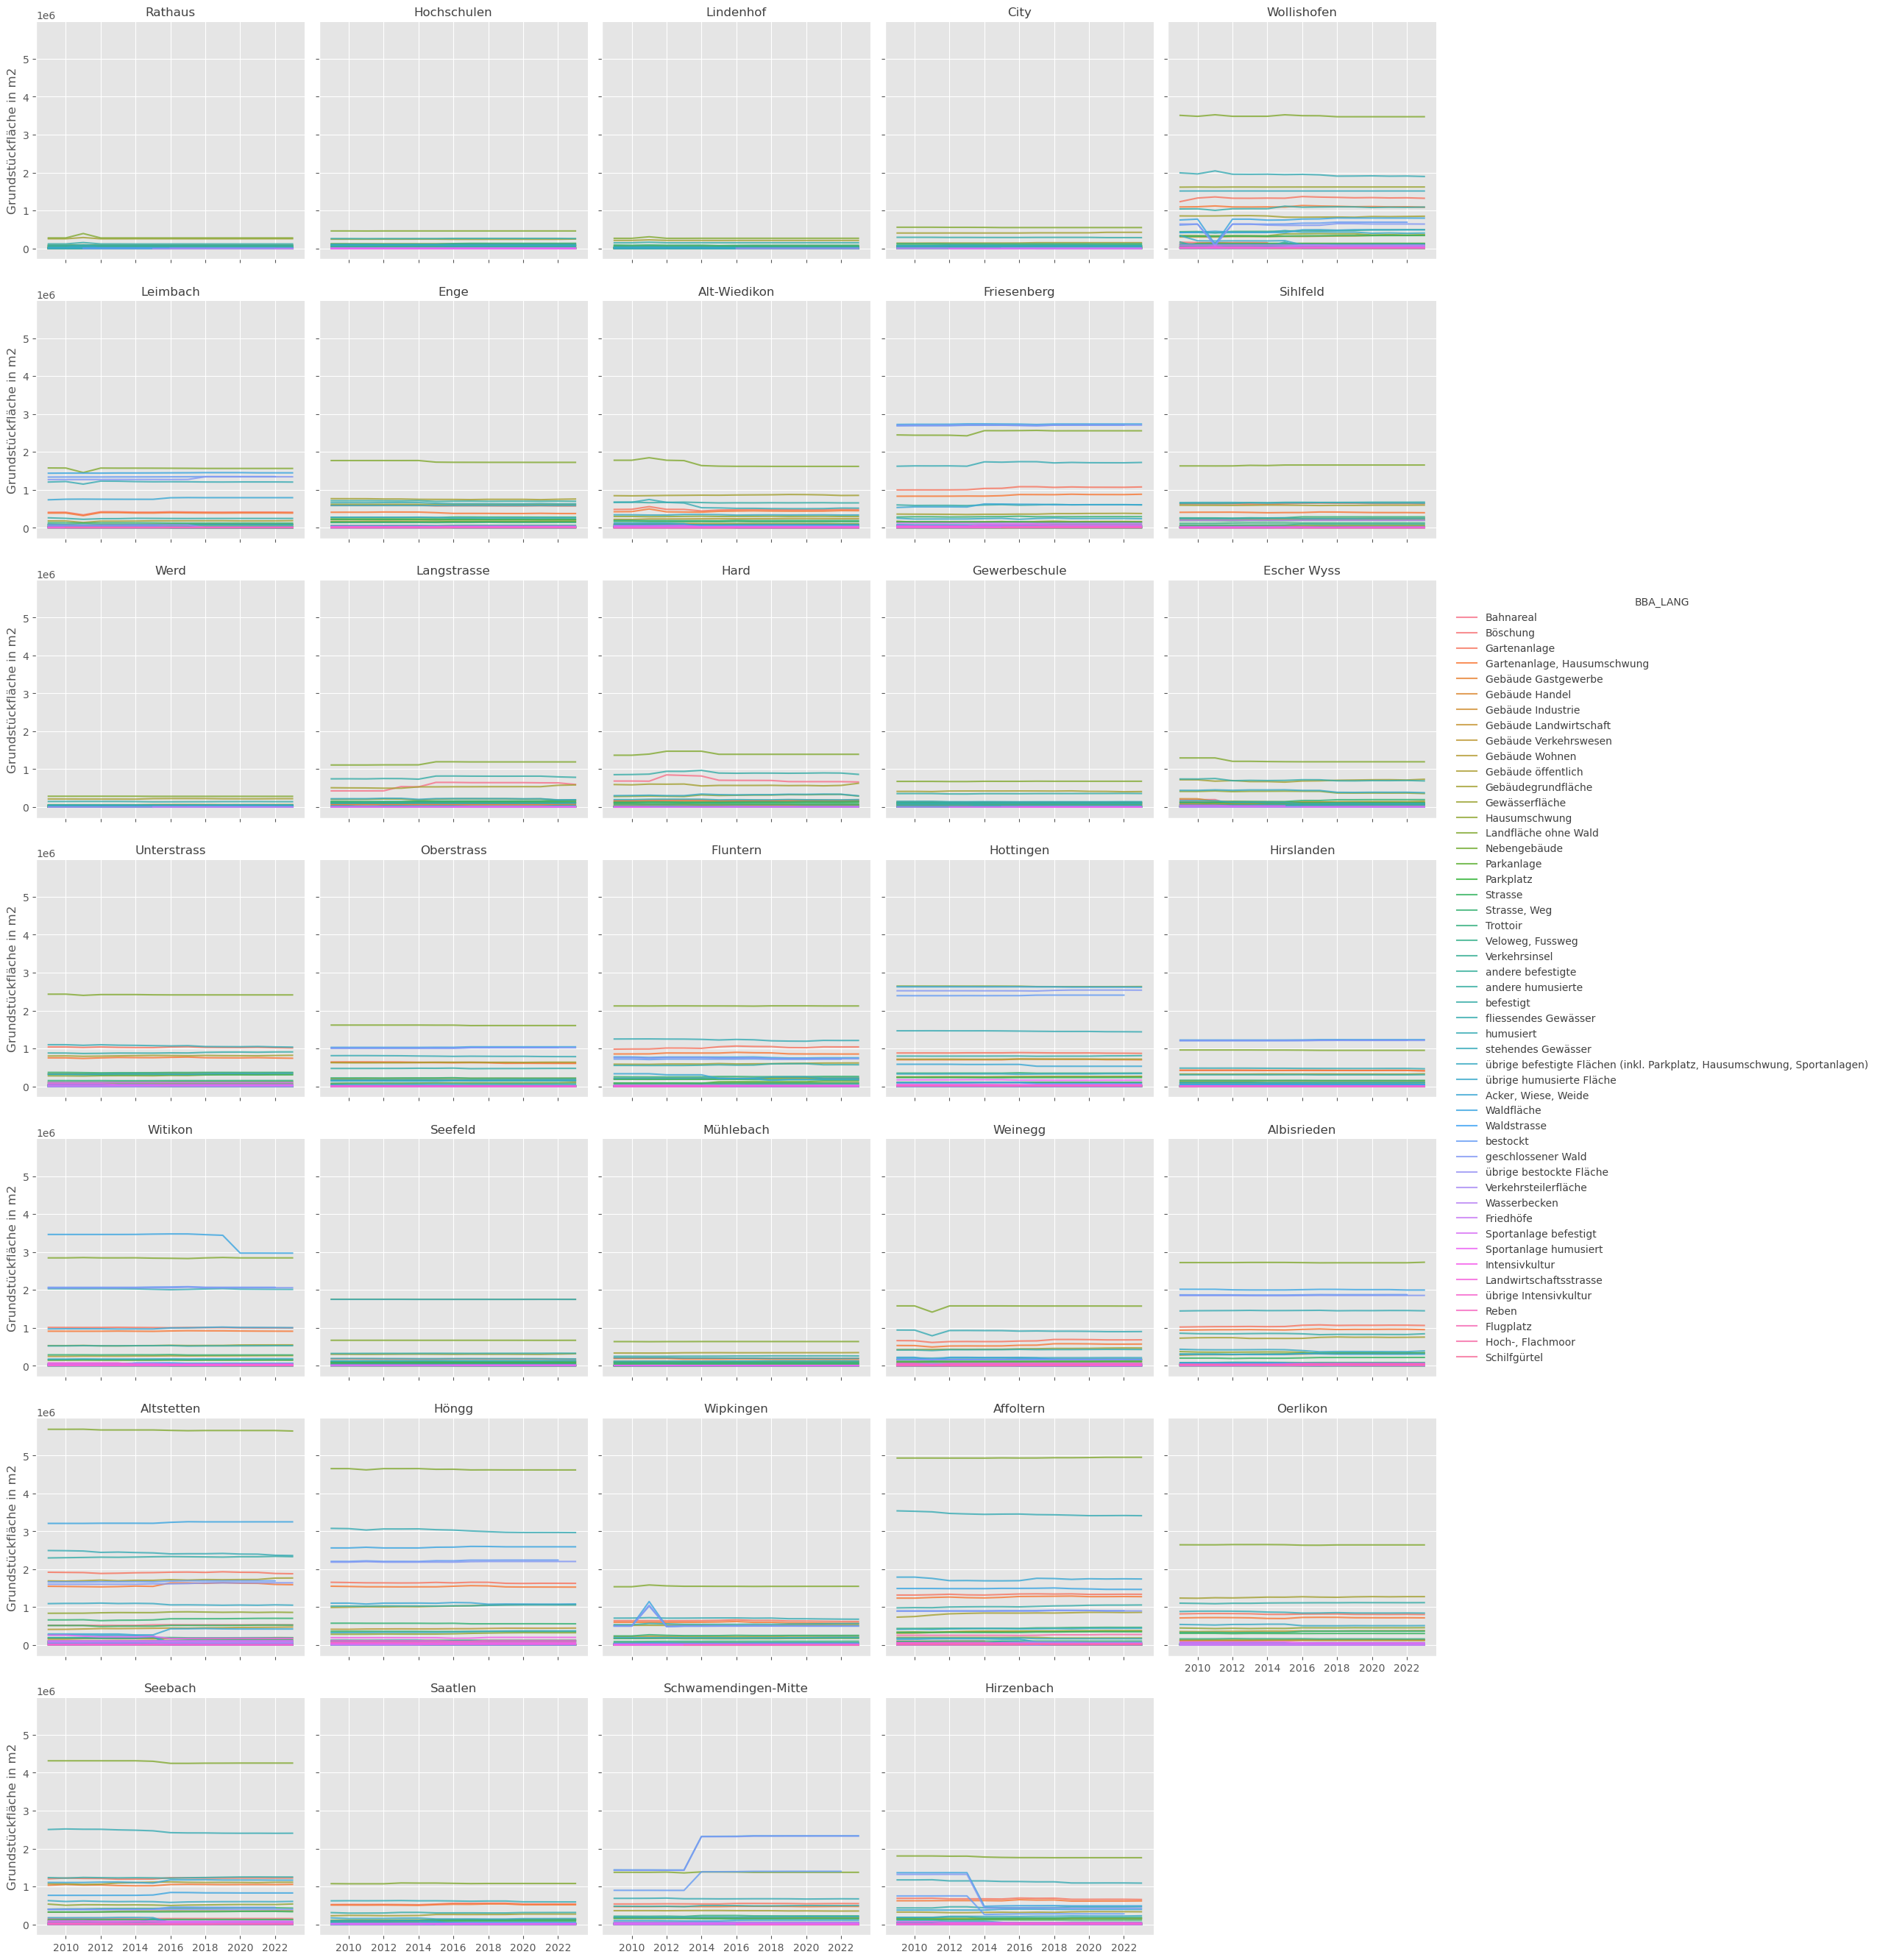

In [50]:
faced_grid1 = mypy_dv.plot_sns_facetgrid(
    data = myFG.reset_index()
    , col = "RAUM_LANG"
    , hue = "BBA_LANG"
    , col_wrap = 5
    , height = 3
    , grafiktyp = sns.lineplot
    , x = "Jahr"
    , y = "sum_GSF"
    , ylabel= "Grundstückfläche in m2"
    , myHeaderTitle="Grundstückfläche nach Bodenbedeckungsart und Stadtquartier, seit "+str(data2betested.index.year.min())
    )

In [51]:
grafic_name = package_name+"_fg_bba_raum_zeit"+date_today+".png"

print('grafiken_testing/'+grafic_name)


faced_grid1.savefig('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bau612od6120_fg_bba_raum_zeit_2024-07-04.png


FileNotFoundError: [Errno 2] No such file or directory: '/content/colab/losd/grafiken_testing/bau612od6120_fg_bba_raum_zeit_2024-07-04.png'

In [ ]:
myFG2 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['Jahr','StichtagDatJahr_str', 'RAUM_LANG', 'RAUM_CODE', 'RAUM_my_sort', 'EIG_LANG','EIG_CODE',]) \
    .agg(sum_GSF=('GSF', 'sum'), cnt_GSF=('GSF', 'count')) \
    .sort_values(['RAUM_my_sort','Jahr'], ascending=[True, True]) 

myFG2.reset_index().head(2)

Jahr StichtagDatJahr_str RAUM_LANG RAUM_CODE  RAUM_my_sort                 EIG_LANG EIG_CODE  \
0  2009          2009-12-31   Rathaus    R00011            11       Aktiengesellschaft  EIG1501   
1  2009          2009-12-31   Rathaus    R00011            11  Aktiengesellschaft Bank  EIG1514   

   sum_GSF  cnt_GSF  
0    18036       10  
1      488        2

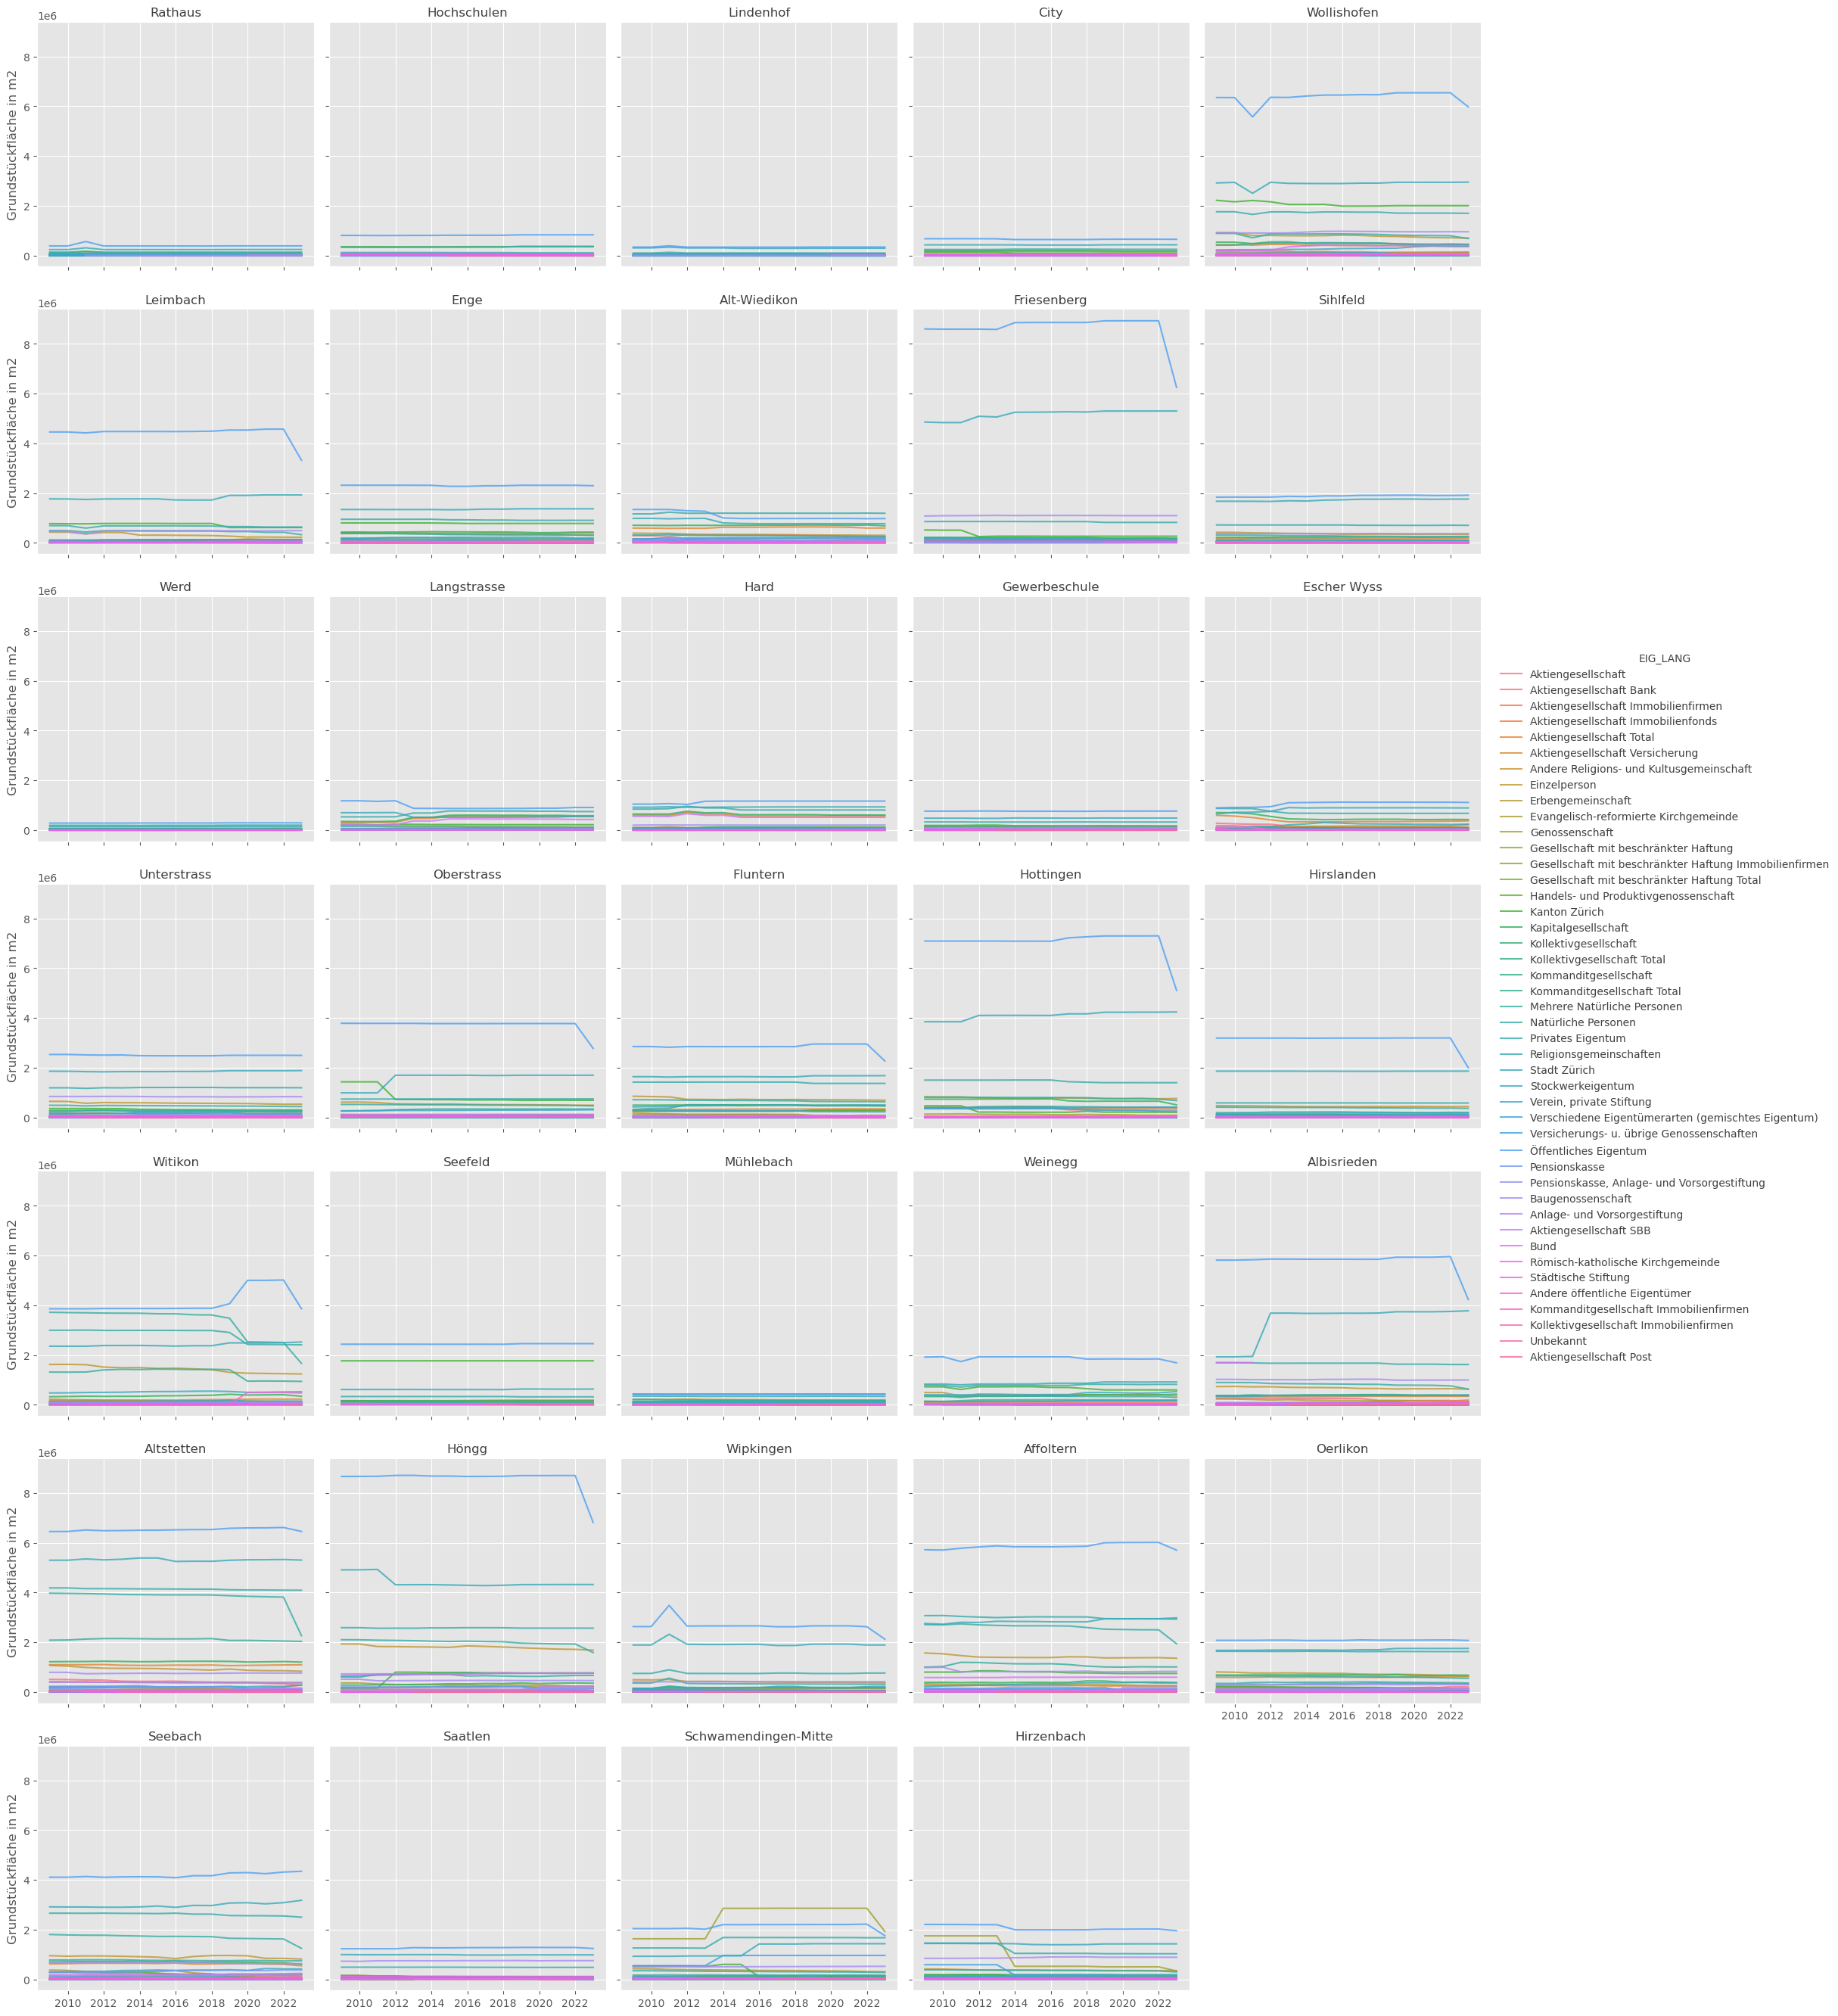

In [ ]:
faced_grid2 = mypy_dv.plot_sns_facetgrid(
    data = myFG2.reset_index()
    , col = "RAUM_LANG"
    , hue = "EIG_LANG"
    , col_wrap = 5
    , height = 3
    , grafiktyp = sns.lineplot
    , x = "Jahr"
    , y = "sum_GSF"
    , ylabel= "Grundstückfläche in m2"
    , myHeaderTitle="Grundstückfläche nach Eigentümerart und Stadtquartier, seit "+str(data2betested.index.year.min())
    )

In [ ]:
grafic_name = package_name+"_fg_eig_raum_zeit"+date_today+".png"

print('grafiken_testing/'+grafic_name)


faced_grid2.savefig('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bau612od6120_fg_eig_raum_zeit_2024-06-19.png


#### Treemaps

In [ ]:
data2betested.columns

Index(['ZEIT_LANG', 'ZEIT_CODE', 'RAUM_LANG', 'RAUM_CODE', 'EIG_LANG', 'EIG_CODE', 'BBA_LANG',
       'BBA_CODE', 'GSF', 'KREISEZH_LANG', 'KREISEZH_CODE', 'StichtagDatJahr_str', 'Jahr',
       'RAUM_my_sort'],
      dtype='object')

In [ ]:
myTM = data2betested.loc[data_max_date]\
    .groupby(['Jahr','StichtagDatJahr_str','KREISEZH_LANG', 'KREISEZH_CODE', 'EIG_LANG', 'EIG_CODE', 'BBA_LANG','BBA_CODE','RAUM_my_sort']) \
    .agg(sum_GSF=('GSF', 'sum'), cnt_GSF=('GSF', 'count')) \
    .sort_values(['RAUM_my_sort','Jahr'], ascending=[True, True]) 

myTM.reset_index().head(2)

Jahr StichtagDatJahr_str                   KREISEZH_LANG KREISEZH_CODE            EIG_LANG  \
0  2023          2023-12-31  Kreis 1 (Stadtgebiet vor 1893)        R10000  Aktiengesellschaft   
1  2023          2023-12-31  Kreis 1 (Stadtgebiet vor 1893)        R10000  Aktiengesellschaft   

  EIG_CODE                     BBA_LANG BBA_CODE  RAUM_my_sort  sum_GSF  cnt_GSF  
0  EIG1501  Gartenanlage, Hausumschwung  BBA1426            11      267        1  
1  EIG1501          Gebäude Gastgewerbe  BBA1109            11     2771        1

In [ ]:
#, levels = "'GNA_LANG', 'BAP_LANG','KREISEZH_LANG'"

treeMap1 = mypy_dv.plot_px_treemap(
    data=myTM.reset_index()
    ,levels=['KREISEZH_LANG', 'EIG_LANG', 'BBA_LANG']
    ,values="sum_GSF"
    ,color="BBA_LANG"
    ,myHeaderTitle="Grundstückfläche nach Kreis, Eigentümerart und Bodenbedeckungsart, "+data_max_date
    ,color_discrete_map={'(?)':'lightgrey', 'Wohnen':'lightblue'}                
    #,margin_val_bottom=25
    #,margin_val_bottom=25
)
treeMap1


path: [<plotly.express._special_inputs.Constant object at 0x00000195D924A650>, 'KREISEZH_LANG', 'EIG_LANG', 'BBA_LANG']
Typ von path: <class 'list'>


In [ ]:
treeMap2 = mypy_dv.plot_px_treemap(
    data=myTM.reset_index()
    ,levels=['EIG_LANG', 'KREISEZH_LANG', 'BBA_LANG']
    ,values="sum_GSF"
    ,color="BBA_LANG"
    ,myHeaderTitle="Grundstückfläche nach Eigentümerart, Kreis und Bodenbedeckungsart, "+data_max_date
    ,color_discrete_map={'(?)':'lightgrey', 'Wohnen':'lightblue'}                
    #,margin_val_bottom=25
    #,margin_val_bottom=25
)
treeMap2


path: [<plotly.express._special_inputs.Constant object at 0x00000195D75741D0>, 'EIG_LANG', 'KREISEZH_LANG', 'BBA_LANG']
Typ von path: <class 'list'>


In [ ]:
grafic_name = package_name+"_tm_kreis_eigart_bbart"+date_today+".png"
print(grafic_name)

treeMap1.write_image('grafiken_testing/'+grafic_name)

bau612od6120_tm_kreis_eigart_bbart_2024-06-19.png


AttributeError: 'NoneType' object has no attribute 'write_image'

## ---------------------- hier Plausi beendet

Übersicht zu LOSD-Jobs:
[Sharepoint](https://kollaboration.intranet.stzh.ch/orga/ssz-produkte/Lists/SASA_Outputs/OGD%20Metadaten.aspx#InplviewHasheb69a2c0-ed94-4ef2-91a5-3b19f038e442=FilterField1%3DMetadaten%255Fx002d%255FPublikations%255Fx00-FilterValue1%3DINT)